# Set up and module installation

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import statsmodels.api as sm

In [2]:
#load our cleaned data in

In [3]:
data_path = "cleaned_data.csv"

In [4]:
data = pd.read_csv(data_path)

In [5]:
data.head()

,Unnamed: 0,hhid,year,region,femaleh,satth,hhsize,f0t6,m0t6,f7t12,...,Java and Bali,Kalimantan,Sulawesi,%work10t12,%work13t15,%work16t18,%work10t18_x,Childlabour_05,%work10t18_y,Childlabour_06
0,0,1.201160e+11,2005,Sumatra,0,Primary,10,0.0,0.0,0.000000,...,0,0,0,0.0,0.0,0.000000,0.000000,0,0.00,0
1,1,1.201160e+11,2005,Sumatra,0,Primary,7,0.0,0.0,0.142857,...,0,0,0,0.0,0.0,0.000000,0.000000,0,0.25,1
2,2,1.201160e+11,2005,Sumatra,0,Primary,6,0.0,0.0,0.000000,...,0,0,0,0.0,0.0,0.166667,0.166667,1,0.00,0
3,3,1.202050e+11,2005,Sumatra,0,Primary,5,0.0,0.0,0.000000,...,0,0,0,0.0,0.0,0.200000,0.200000,1,0.20,1
4,4,1.202050e+11,2005,Sumatra,0,Primary,3,0.0,0.0,0.000000,...,0,0,0,0.0,0.0,0.000000,0.000000,0,0.00,0


In [6]:
data=data.drop(["Unnamed: 0", "%work10t18_y", "year"], axis=1)

In [7]:
data.head()

,hhid,region,femaleh,satth,hhsize,f0t6,m0t6,f7t12,m7t12,f13t15,...,Sumatra,Java and Bali,Kalimantan,Sulawesi,%work10t12,%work13t15,%work16t18,%work10t18_x,Childlabour_05,Childlabour_06
0,1.201160e+11,Sumatra,0,Primary,10,0.0,0.0,0.000000,0.000000,0.100000,...,1,0,0,0,0.0,0.0,0.000000,0.000000,0,0
1,1.201160e+11,Sumatra,0,Primary,7,0.0,0.0,0.142857,0.000000,0.000000,...,1,0,0,0,0.0,0.0,0.000000,0.000000,0,1
2,1.201160e+11,Sumatra,0,Primary,6,0.0,0.0,0.000000,0.333333,0.166667,...,1,0,0,0,0.0,0.0,0.166667,0.166667,1,0
3,1.202050e+11,Sumatra,0,Primary,5,0.0,0.0,0.000000,0.000000,0.000000,...,1,0,0,0,0.0,0.0,0.200000,0.200000,1,1
4,1.202050e+11,Sumatra,0,Primary,3,0.0,0.0,0.000000,0.000000,0.000000,...,1,0,0,0,0.0,0.0,0.000000,0.000000,0,0


# Data exploration

In [8]:
#First let's get a look at the occurences of our target variable "Childlabour_y", 
#which is the occurence of child labour within a household in 2006
data['Childlabour_06'].value_counts()

0    4094
1     259
Name: Childlabour_06, dtype: int64

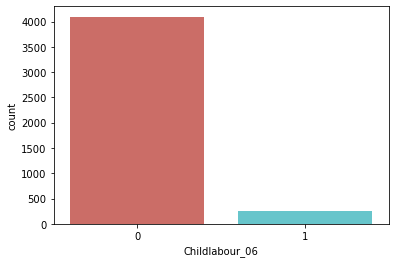

In [9]:
sns.countplot(x="Childlabour_06", data=data, palette='hls')
plt.show()

In [10]:
#Some further exploration of our explanatory variables from 2005. We will change the default display setting so we can see all the columns

In [11]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(data.groupby("Childlabour_06").mean())

,hhid,femaleh,hhsize,f0t6,m0t6,f7t12,m7t12,f13t15,f16t18,f19t60,m13t15,m16t18,m19t60,f61,m61,rural,No education,Primary,Junior secondary,Senior secondary,Higher,Quintile 1,Quintile 2,Quintile 3,Quintile 4,Quintile 5,Other islands,Sumatra,Java and Bali,Kalimantan,Sulawesi,%work10t12,%work13t15,%work16t18,%work10t18_x,Childlabour_05
Childlabour_06,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.834389e+11,0.097215,4.008549,0.056587,0.060691,0.061651,0.064718,0.023325,0.023116,0.304007,0.022509,0.020775,0.290588,0.047240,0.040535,0.523205,0.242794,0.325110,0.141915,0.223009,0.067171,0.125794,0.174890,0.202736,0.235711,0.260870,0.071568,0.203468,0.562042,0.089888,0.073034,0.000334,0.002041,0.009074,0.011449,0.050073
1,4.250288e+11,0.096525,5.034749,0.042039,0.039635,0.080732,0.068507,0.055254,0.050418,0.252939,0.064658,0.073946,0.250106,0.016518,0.022670,0.694981,0.316602,0.436293,0.127413,0.081081,0.038610,0.262548,0.220077,0.181467,0.150579,0.185328,0.092664,0.212355,0.432432,0.146718,0.115830,0.004413,0.036275,0.076097,0.116785,0.455598


In [12]:
#Worth noting that households with childlabour in 2006 showed the following traits:
#slightly larger household sizes (average of 5 vs 4 household members).
#were more likely to be rural (69% for child labour households, 52% of non-child labour households)
#more likely to have lower education levels (approx 75% have primary school or none)
#were more likely to fall into the lower income quartiles (48% were quintile 2 or lower)
#more likely to occur in poorer regions such as Kalimantan and Sulawesi, as opposed to wealthier regions such as Java or Bali

Text(0, 0.5, 'Proportion of households with child labour')

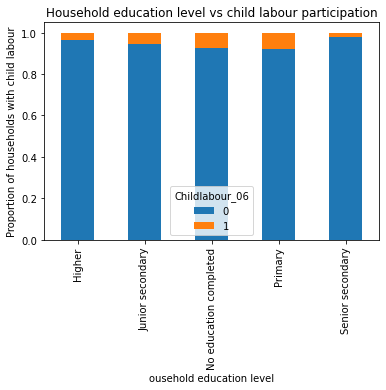

In [13]:
table=pd.crosstab(data.satth, data.Childlabour_06)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Household education level vs child labour participation')
plt.xlabel('ousehold education level')
plt.ylabel('Proportion of households with child labour')

Text(0, 0.5, 'Proportion of households with child labour')

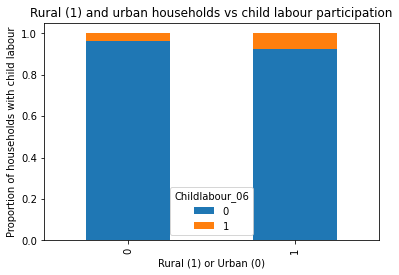

In [14]:
table=pd.crosstab(data.rural, data.Childlabour_06)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Rural (1) and urban households vs child labour participation')
plt.xlabel('Rural (1) or Urban (0)')
plt.ylabel('Proportion of households with child labour')

Text(0, 0.5, 'Proportion of households with child labour')

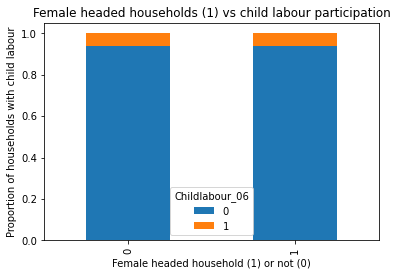

In [15]:
table=pd.crosstab(data.femaleh, data.Childlabour_06)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Female headed households (1) vs child labour participation')
plt.xlabel('Female headed household (1) or not (0)')
plt.ylabel('Proportion of households with child labour')

# Specify model and split data

In [16]:
# Assign X (data) and y (target)
X = data.drop(["Childlabour_06", "region", "quint", "satth", "Higher", "Quintile 5", "Other islands", "hhid"], axis=1)
y = data["Childlabour_06"]
print(X.shape, y.shape)

(4353, 32) (4353,)


In [17]:
#Split our data into training and testing

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [30]:
type(X_test)

pandas.core.frame.DataFrame

In [31]:
X_test.shape

(1089, 32)

In [32]:
X_train.shape

(3264, 32)

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter = 10000)
classifier

LogisticRegression(max_iter=10000)

In [21]:
#Fit (train) or model using the training data

In [22]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

# Check model fit

In [23]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9424019607843137
Testing Data Score: 0.9393939393939394


In [24]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0]
First 10 Actual labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [25]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1084,0,0
1085,0,1
1086,0,0
1087,0,0


In [26]:
#Let's get a statistical summary of our logistic model
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.172003
         Iterations 9
                                  Results: Logit
Model:                     Logit                 Pseudo R-squared:      0.238     
Dependent Variable:        Childlabour_06        AIC:                   1559.4618 
Date:                      2020-10-20 00:16      BIC:                   1757.1991 
No. Observations:          4353                  Log-Likelihood:        -748.73   
Df Model:                  30                    LL-Null:               -981.98   
Df Residuals:              4322                  LLR p-value:           8.6376e-80
Converged:                 1.0000                Scale:                 1.0000    
No. Iterations:            9.0000                                                 
----------------------------------------------------------------------------------
                  Coef.     Std.Err.      z    P>|z|      [0.025         0.975]   
-------------------

In [ ]:
#Hmmmmm this doesn't look quite right to be honest- no education or income quintiles are showing as statistically significant
#Low r-squared score. Damn
#May need to add in the last of each dummy variables. 
#Consider scaling household size?

# Analysis of Model performance

In [ ]:
#confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[1016   11]
 [  55    7]]


In [ ]:
# Referring to documentation www.scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#the confusion matrix returns an output array as below for a binary target variable:
#  [(tn, fp, 
 #   fn, tp)]
    

In [ ]:
#So the confusion matrix tells us of 1089 predictions in the X_test and y_test data set, there were 1016 True Negative results, 
#and 7 True Positives for a total of 1025 correct predictions


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1027
           1       0.39      0.11      0.18        62

    accuracy                           0.94      1089
   macro avg       0.67      0.55      0.57      1089
weighted avg       0.92      0.94      0.92      1089



In [ ]:
#So overall our model doesn't seem that bad. 
#BUT it seems quite bad at actually correctly identifying/predicting households where children go on to enter the labour market.